In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('Medicalpremium.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

The data scientists were inspired to work on an medical insurance dataset because of being situated in the United States with no standardized system of healthcare. Because of the number of Health insurers filing the health statement type with the NAIC increased to 1,096 from 1,031 in 2019, the data scientists determined that there was an large amount of information but often no easy way to gain quotes easily [1]. As students on family plans, the data scientists anticipate that they will need to learn the ins and outs of choosing insurance and understand exactly what predictors affect insurance premiums. Under health care law, only five categories are allowed to be accounted for: age, location, tobacco use, individual v. family enrollment, and plan category [2]. 

In India, all Indian citizens can get free outpatient and inpatient care at government facilities, yet many citizens end up deferring to get privatized heathcare because of the severe shortages of staff and supplies at government facilities [3]. The government of India provides hospital coverage for most diseases and pre-existing health conditions for individuals living below the poverty line [3]. 36% of insured individuals in India have private coverage. 

The US and India are both welfare states, a type of governing where the national government plays a key role in the protection of the economic and social well-being of its citizens [4]. In that respect, both governments are supposed to consider their citizens and aid them; yet, only one has public healthcare for all citizens. The data scientists were curious in investigating how private healthcare fared in India. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

The data scientists aimed to create a model that minimized the root mean squared error (RMSE) because they are working with a continuous predictor, as the data scientists are predicting how much an individual’s medical insurance premium is. The Yearly Premium Price in the training data ranges from ₹15,000 to ₹40,000, so the data scientist should expect our predictions to be within that range as well. The data scientists will be minimizing RMSE because the data scientists want to penalize larger errors more to get the best fit in a model.

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

What data did you use? Provide details about your data. Include links to data if you are using open-access data.
To create the models, the data scientists utilized a ‘Medical Insurance Premium Prediction’ which can be found on a data science company’s website, Kaggle. The dataset included variables: age, diabetes, abnormality in blood pressure, any transplant, any chronic disease, height, weight, known allergies, of an blood relative had cancer, and number of major surgeries. There are 4 The data scientists predicted the premium price. 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

There are two groups of stakeholders:

(1) Insurance providers - this information directly relates to insurance premiums, so if companies implement our algorithm, they can create a pricing model that can better predict customers who would have to pay a higher premium, so they will make more money if they can effectively target these consumers.

(2) Customers who need insurance - if customers know they are more likely to be identified as paying a higher premium, they can account for this in their budgeting. Also, they can expect when and by how much insurance prices would rise for them if their medical situation changes. 

(3) Finally, health care in India is universal, but severely underfunded and decentralized. There is a burden on individual states to developing funding budgets to finance healthcare premiums for their individual residents. Thus, this model would be EXTREMELY useful to determine how to anticipate premium pricing for individual states and determine how to allot funding according to government budget restrictions. This can go further up the hierarchy by allowing the central government to determine state-by-state budgeting allotments. This is important since although "universal" coverage options exist, many residents tend to pay privately owned local network prices to ensure coverage security. Utilizing this model to stabilize premium pricing could potentially attract more public utilization.


## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

In [6]:
#| echo: false
data.shape

(986, 11)

Our data has 986 observations and 11 variables.

In [7]:
#| echo: false
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


From this, we know that there are no null instances, so we do not need to impute data.

In [8]:
#| echo: false
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Since our data already had dummies for all the categorical variables, no further cleaning or preparation was needed. The continuous variables are Age, Height, Weight, and NumberOfMajorSurgeries. All other variables are categorical: Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseasesKnownAllergies, and HistoryOfCancerInFamily. Our target variable is PremiumPrice, a continuous variable, making this a regression problem.

In [12]:
#| echo: false
data_dict = {'Variable Name': ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height',
                                     'Weight','KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries','PremiumPrice'], 'Missing Values': ['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'], 'Unique Values': [49, 2, 2, 2, 2, 44, 74, 2, 2, 4, 24]}

pd.DataFrame(data_dict)

,Variable Name,Missing Values,Unique Values
0,Age,None,49
1,Diabetes,None,2
2,BloodPressureProblems,None,2
3,AnyTransplants,None,2
4,AnyChronicDiseases,None,2
5,Height,None,44
6,Weight,None,74
7,KnownAllergies,None,2
8,HistoryOfCancerInFamily,None,2
9,NumberOfMajorSurgeries,None,4


In [22]:
data_cat_dict2 = {'Age': [43, 27, 42, 35, 45], 'Age_count': [30, 27, 27, 26, 25],
                        'Diabetes': [0, 1, np.NaN, np.NaN, np.NaN],
                        'Diabetes_count': [572, 414, np.NaN, np.NaN, np.NaN],
                        'BloodPressureProblems': [0, 1, np.NaN, np.NaN, np.NaN],
                        'BloodPressureProblems_count': [524, 462, np.NaN, np.NaN, np.NaN],
                        'AnyTransplants': [0, 1, np.NaN, np.NaN, np.NaN],
                        'AnyTransplants_count': [931, 55, np.NaN, np.NaN, np.NaN],
                        'AnyChronicDiseases': [0, 1, np.NaN, np.NaN, np.NaN],
                        'AnyChronicDiseases_count':[808, 178, np.NaN, np.NaN, np.NaN],
                        'Height': [164, 166, 174, 165, 175],
                        'Height_count': [42, 42, 38, 38, 35],
                        'Weight': [73, 75, 74, 70, 67],
                        'Weight_count': [43, 41, 38, 34, 31],
                        'KnownAllergies': [0, 1, np.NaN, np.NaN, np.NaN],
                        'KnownAllergies_count': [774, 212, np.NaN, np.NaN, np.NaN],
                        'HistoryOfCancerInFamily': [0, 1, np.NaN, np.NaN, np.NaN],
                        'HistoryOfCancerInFamily_count': [870, 116, np.NaN, np.NaN, np.NaN],
                        'NumberOfMajorSurgeries': [0, 1, 2, 3, np.NaN],
                        'NumberOfMajorSurgeries_count': [479, 372, 119, 16, np.NaN],
                        'stroke': [23000, 15000, 28000, 25000, 29000],
                        'stroke_count': [249, 202, 132, 103, 72]}
pd.DataFrame(data_cat_dict2)

,Age,Age_count,Diabetes,Diabetes_count,BloodPressureProblems,BloodPressureProblems_count,AnyTransplants,AnyTransplants_count,AnyChronicDiseases,AnyChronicDiseases_count,...,Weight,Weight_count,KnownAllergies,KnownAllergies_count,HistoryOfCancerInFamily,HistoryOfCancerInFamily_count,NumberOfMajorSurgeries,NumberOfMajorSurgeries_count,stroke,stroke_count
0,43,30,0.0,572.0,0.0,524.0,0.0,931.0,0.0,808.0,...,73,43,0.0,774.0,0.0,870.0,0.0,479.0,23000,249
1,27,27,1.0,414.0,1.0,462.0,1.0,55.0,1.0,178.0,...,75,41,1.0,212.0,1.0,116.0,1.0,372.0,15000,202
2,42,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74,38,NaN,NaN,NaN,NaN,2.0,119.0,28000,132
3,35,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70,34,NaN,NaN,NaN,NaN,3.0,16.0,25000,103
4,45,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67,31,NaN,NaN,NaN,NaN,NaN,NaN,29000,72


<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

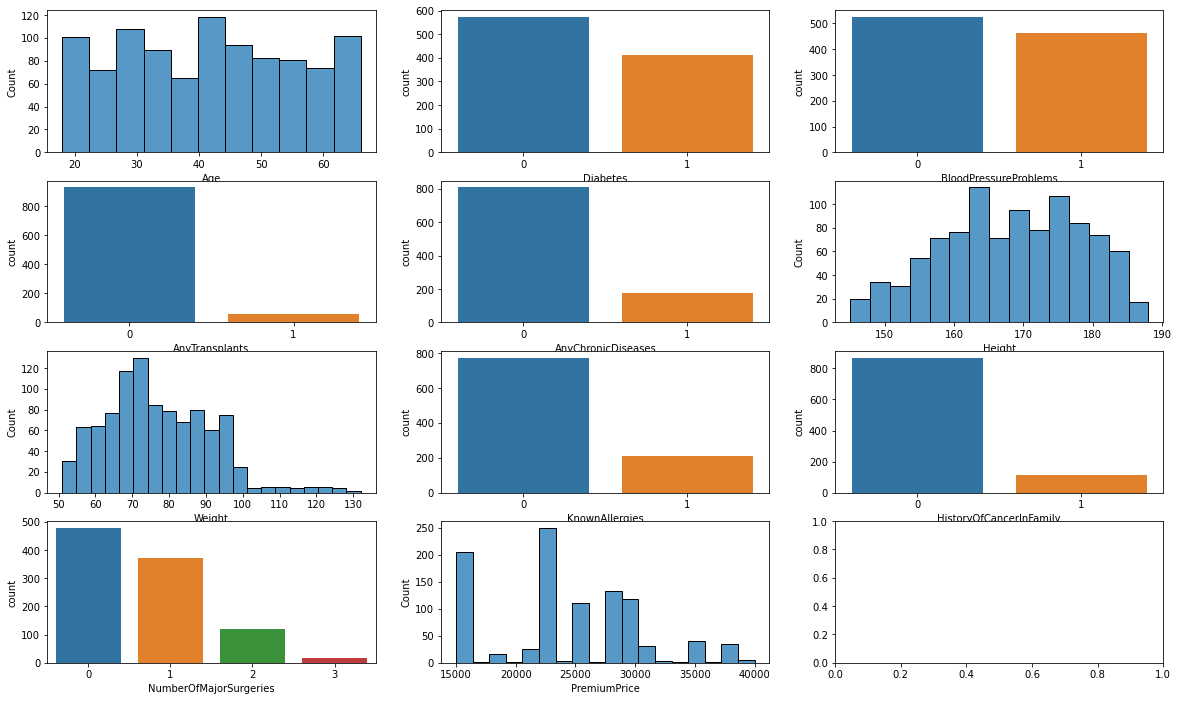

In [23]:
#| echo: false
# Distribution of variables and target variable
fig, axes = plt.subplots(4,3,figsize=(20,12))
plt.subplots_adjust(wspace=0.2)
sns.histplot(data=data,x='Age',ax=axes[0,0])
sns.countplot(data=data,x='Diabetes',ax=axes[0,1])
sns.countplot(data=data,x='BloodPressureProblems',ax=axes[0,2])
sns.countplot(data=data,x='AnyTransplants',ax=axes[1,0])
sns.countplot(data=data,x='AnyChronicDiseases',ax=axes[1,1])
sns.histplot(data=data,x='Height',ax=axes[1,2])
sns.histplot(data=data,x='Weight',ax=axes[2,0])
sns.countplot(data=data,x='KnownAllergies',ax=axes[2,1])
sns.countplot(data=data,x='HistoryOfCancerInFamily',ax=axes[2,2])
sns.countplot(data=data,x='NumberOfMajorSurgeries',ax=axes[3,0])
sns.histplot(data=data,x='PremiumPrice',ax=axes[3,1])

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

<AxesSubplot:>

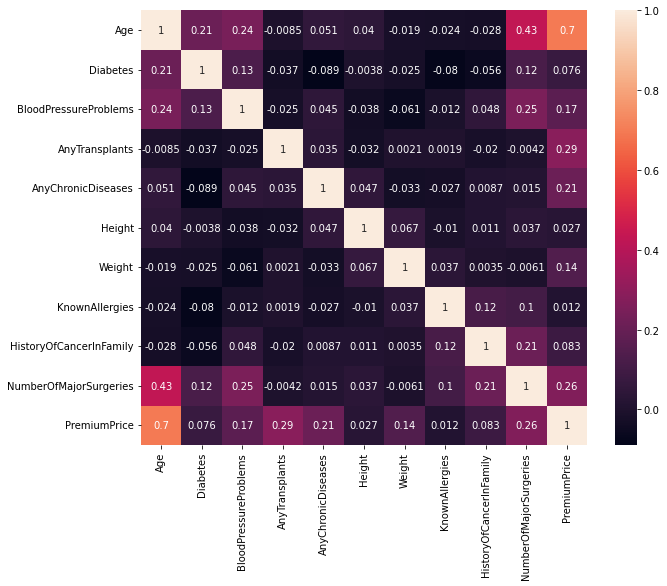

In [15]:
#| echo: false
# Visualize correlations
corr_table = data.corr()

%matplotlib inline 
plt.figure(figsize=(10,8))
sns.heatmap(corr_table,annot=True)

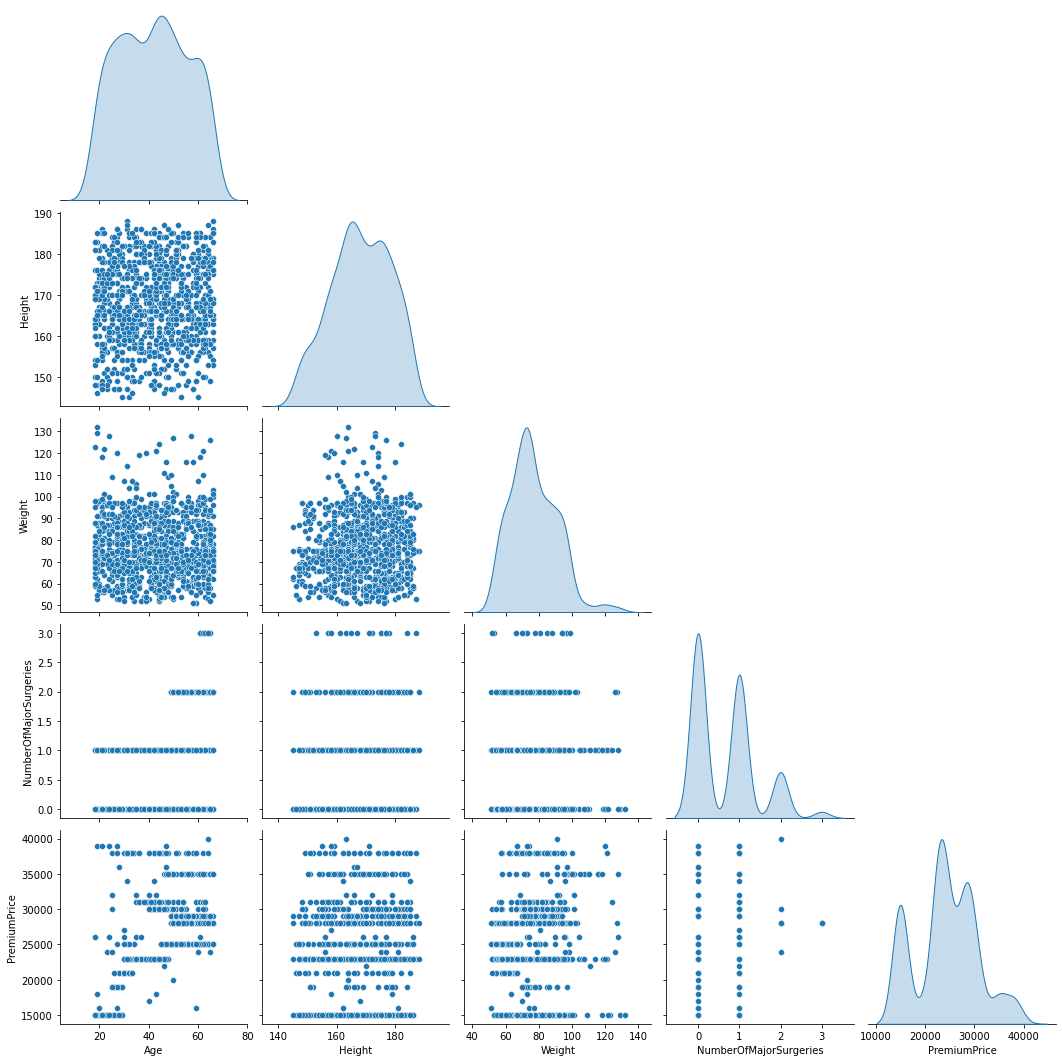

In [25]:
#| echo: false
sns.pairplot(data=data[['Age','Height','Weight','NumberOfMajorSurgeries','PremiumPrice']],corner=True,diag_kind="kde",height=3)

From the correlations to the response variable, we expect that the most important features are Age, AnyTransplants, and NumberofMajorSurgeries. However, it can be hard to use this correlation table exactly because we have so many categorical variables that do not correlate well. However, we also do not have any concerns with correlated predictors because there are not any variables that have too high of a correlation that would impact the model.

This pairplot of the continuous variables confirms what we knew from the previous visualizations, that there is not too strong of a correlation between variables that we would like to use in our model.

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### MARS and Bagged MARS
*By Allen Zhang*



### AdaBoost & XGBoost
*By Cara Chang*

### AdaBoost
Best RMSE: 2488.356725214291
I first did some visualizations based on the class notes. From the number of trees graph, I focused on the range from 10 to 250 because this allows the model to find where cross-validation error is lowest without spending too much computational power when number of trees exceeds 50. For the depths, I tried max depths from 9 to 14 to include a more focused range that includes where the error decreases and does not sacrifice computational power once the depth exceeds 14. I looped through multiple learning rates in the range of 0 to 2 because the errors tend to decrease as the learning rate increases, but I will not exceed 2.0.
Based on the graphs, I performed my coarse gridsearch with max_depths of trees between 3-15, learning rate 0.0001-1.5. For the sake of completeness, I will allow n_estimators to go up to 2500, but I do not expect this to drastically improve the fit of the model since the number of trees does not appear to improve cv error after 250 trees.
<table style="width:100%">
  <tr>
    <th>Grid Search</th>
    <th>Parameter Grid</th>
    <th>Best Parameters</th> 
    <th>Test RMSE</th>
  </tr>
  <tr>
    <td>1</td>
    <td>'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 1.5],
        'n_estimators': [10, 50, 100, 200, 500, 1000, 2000, 2500],
        ‘base_estimator’: [DecisionTreeRegressor(max_depth=3),
        DecisionTreeRegressor(max_depth=5),
        DecisionTreeRegressor(max_depth=8),
        DecisionTreeRegressor(max_depth=11),
        DecisionTreeRegressor(max_depth=13),
        DecisionTreeRegressor(max_depth=15)]
      </td>
    <td>'learning_rate': 0.0001,
        'n_estimators': 200,
        ‘base_estimator’: DecisionTreeRegressor(max_depth=13)
</td>
      <td>2488.356725214291</td>
  </tr>
  <tr>
    <td>2</td>
    <td>'learning_rate': [0.00008, 0.00009, 0.0001, 0.0011, 0.00112],
        'n_estimators': [180, 190, 200, 210, 220],
        ‘base_estimator’: [DecisionTreeRegressor(max_depth=10),
        DecisionTreeRegressor(max_depth=11),
                          DecisionTreeRegressor(max_depth=12),
        DecisionTreeRegressor(max_depth=13),
        DecisionTreeRegressor(max_depth=14),
        DecisionTreeRegressor(max_depth=15),
        DecisionTreeRegressor(max_depth=16)]
</td>
    <td>'learning_rate': 0.00009,
        'n_estimators': 210,
        ‘base_estimator’: DecisionTreeRegressor(max_depth=11)

</td>   
      <td>2537.6394022983528</td>
  </tr>
    <tr>
    <td>3</td>
    <td>'learning_rate': [0.0001, 0.00015, 0.00009, 0.00007, 0.00005, 0.00003],
        'n_estimators': [195, 200, 205, 210, 215],
        ‘base_estimator’: [DecisionTreeRegressor(max_depth=12),
        DecisionTreeRegressor(max_depth=13),
        DecisionTreeRegressor(max_depth=14),
        DecisionTreeRegressor(max_depth=15)]
</td>
    <td>'learning_rate': 0.00005,
        'n_estimators': 210,
        ‘base_estimator’: DecisionTreeRegressor(max_depth=13)
</td>  
        <td>2524.626184950432</td>
  </tr>
    <tr>
    <td>4</td>
    <td>'learning_rate': [0.0001, 0.00009, 0.00015, 0.00005, 0.00008],
        'n_estimators': [300, 325, 350, 375, 400, 425, 450, 475],
        ‘base_estimator’: [DecisionTreeRegressor(max_depth=8),
        DecisionTreeRegressor(max_depth=9),
        DecisionTreeRegressor(max_depth=10),
        DecisionTreeRegressor(max_depth=11),
        DecisionTreeRegressor(max_depth=12),
        DecisionTreeRegressor(max_depth=13)]
</td>
    <td>'learning_rate': 0.00015,
        'n_estimators': 375,
        ‘base_estimator’: DecisionTreeRegressor(max_depth=13)
</td> 
        <td>2524.626184950432</td>
  </tr>
</table>

### XGBoost
Best RMSE: 2488.86943122221
Similarly to AdaBoost, the initial XGBoost performed the best, which I tuned using ballparks of the best Gradient Boosting params since these base models are the same. I zoomed into the best params after the coarse grid, but this decreased the model performance. The third grid I performed, I made the max depth even smaller and kept trying to narrow my grid from the second search, and performance stayed relatively the same. Finally, I zoomed into gamma ranges more, which decreased the error in the last grid search to a little over 25000, but the initial grid search was still the best.
<table style="width:100%">
  <tr>
    <th>Grid Search</th>
    <th>Parameter Grid</th>
    <th>Best Parameters</th> 
    <th>Test RMSE</th>
  </tr>
  <tr>
      <td>1</td>
    <td>'n_estimators': [60, 80, 100, 500, 1000],
        'learning_rate': [0.0001, 0.001, 0.01, 1, 2],
       'max_depth': [4, 5, 6, 7], 'subsample': [0.5,0.75,1],
        'reg_lambda':[0, 0.5, 1, 2], 'gamma': [0, 1, 10, 100, 1000]
      </td>
    <td>'gamma': 100,
        'learning_rate': 0.01,
        'max_depth': 6,
        'n_estimators': 500,
        'reg_lambda': 0.5,
        'subsample': 0.75
</td> 
      <td>2488.86943122221</td>
        </tr>
  <tr>
      <td>2</td>
    <td>'n_estimators': [400, 500, 600],
        'learning_rate': [0.008, 0.01, 0.015,0.05],
       'max_depth': [4, 5, 6, 7],
        'subsample': [0.6,0.75,1],
        'reg_lambda':[0.4, 0.5, 0.75],
        'gamma': [80, 100, 120]
</td>
    <td>'gamma': 120,
        'learning_rate': 0.008,
        'max_depth': 6,
        'n_estimators': 600,
        'reg_lambda': 0.4,
        'subsample': 0.6

</td>   
      <td>2537.4511432583727</td>
  </tr>
    <tr>
    <td>3</td>
    <td>'n_estimators': [10, 20, 30, 40],
        'learning_rate': [0.001, 0.01, 0.1, 1, 2],
       'max_depth': [4, 5, 6, 7],
        'subsample': [0.6,0.75,1],
        'reg_lambda':[0, 0.4, 0.5, 0.75, 1],
        'gamma': [1, 10, 80, 100, 120]
</td>
    <td>'gamma': 1,
        'learning_rate': 0.1,
        'max_depth': 7,
        'n_estimators': 40,
        'reg_lambda': 0.75,
        'subsample': 0.75
</td>  
        <td>2538.605739618403</td>
  </tr>
    <tr>
    <td>4</td>
    <td>'n_estimators': [30, 40, 50, 60, 70],
        'learning_rate': [0.01, 0.1, 0.15, 0.09],
       'max_depth': [4, 5, 6, 7],
        'subsample': [0.6,0.75,1],
        'reg_lambda':[0, 0.4, 0.5, 0.6, 0.75, 1],
        'gamma': [0, 1, 2, 5, 10]
</td>
    <td>'gamma': 0,
        'learning_rate': 0.09,
        'max_depth': 6,
        'n_estimators': 60,
        'reg_lambda': 0.6,
        'subsample': 0.6
</td> 
        <td>2506.840458906769</td>
  </tr>
</table>

### Random forest
*By Amanda Tsuetaki*

Beginning with the test train split, I split the data with a test size of 20% and a random state of 45. I started by creating a basic decision tree model that had default parameters with a random state of 45. Using the basic decision tree’s RSME, ₹2915, I wanted to create a random forest to better minimize RMSE. The Grid Search 1, I gained the best parameters – 'max_depth': 15, 'max_features': 3, 'max_leaf_nodes': 225, 'n_estimators': 21 – and created model A which had an RMSE of ₹2736 which did not improve much from the simplest decision tree. In Grid Search 2, I focused on only 2 parameters: max_features and bootstrap. I made two models from this grid search. Model B had the hyperparameters: random_state=45, max_features =9, bootstrap = True; Model B had the RMSE of ₹2510. When testing Model C, which was Model B without bootstrapping (against the grid search best parameters), I found that the RMSE was the lowest yet at ₹2424. This conclusion made me wary of the bootstrapping parameter, so I made sure to check both True and False in subsequent models. In Grid Search 3, I focused on max_leaf_nodes and max_depth. With the best parameters, I created Model D with hyperparameters random_state=45, max_features =9, max_depth =10, max_leaf_nodes = 100, bootstrap = True which had an RMSE of ₹2533; I created Model E, Model D with bootstrap = False, which had an RMSE of ₹2477. Through Grid Search 4, I created Model F and Model G. Model F’s parameters are random_state=45, max_features =9, max_depth =7, max_leaf_nodes = 25, bootstrap = True and Model F’s RSME was ₹2584. Model G is Model F with bootstrapping = False, and Model G has an RMSE ₹2294. Through Grid Search 5, I made Model H with the parameters: random_state=45, max_features =9, max_depth =10, max_leaf_nodes = 50, bootstrap = False. Model H has an RMSE of ₹2260. I wanted to check if the RMSE would improve with max_features being "sqrt" or "log2" in Grid Search 6. When creating Model I, the RMSE was comparable to the decision tree at ₹2815. Model H is my best model determined using my grid searches.

1 First Trial
'max_depth': [12,15,18], 'max_leaf_nodes': range(25,250, 50), 'max_features': range(1,4),  'n_estimators': range(1,30,10)
Best Parameters:'max_depth': 15, 'max_features': 3, 'max_leaf_nodes': 225, 'n_estimators': 21

2 Second Trial
'max_features': range(1,26), 'bootstrap': [True, False]
Best Parameters:'bootstrap': True, 'max_features': 9

3 Third Trial
'Max_leaf_nodes': range(100,500,100), 'max_depth': [5,10,15,20,25,30,35]
Best Parameters: 'max_depth': 10, 'max_leaf_nodes': 100

4 Fourth Trial 
'Max_leaf_nodes': range(25,75,5), 'max_depth': [1,3,5,7]
Best Parameters: 'max_depth': 7, 'max_leaf_nodes': 25

5 Fifth Trial
'max_leaf_nodes': range(50,75,10),  'max_depth': [5,7,10,13]
Best Parameters: 'max_depth': 10, 'max_leaf_nodes': 50

6 Sixth Trial
'max_features':["sqrt", "log2"]
Best Parameters: 'max_features': 'sqrt'



### GradBoost
*By Rakin Hussain*

I did some basic visualization comparing metrics against CV error. First, with number of trees, I determined I should stay between 10-500 trees in increments of 10. Depth showed me that I should stay arond 2-7. Learning rate show that 0.1 was the lowest, so I decided to try multiple values within various multiples of 10 under 0.1. The subsample graph seemed a little inconclusive, so I used intuition to only search values about 0.5.

All of the GradientBoost models used Huber Loss. My first randomized search (I only used randomized searches, not grid searches) did not utilize subsample because I wanted to develop a base understanding. I did a randomized search and searched n_estimators between 10-500, learning_rate within [0.00001, 0.0001, 0.001, 0.01, 0.1], and a range between 1-5. This, produced an optimal model with the parameters n_estimators=350, max_depth=4, and learning_rate=0.01. The test RMSE with this combination was approximately 2420, which was good, but could be better.

The next randomized search looks at max_depth within [4,6,8], n_estimators in [100,500,1000], learning_rate in [0.01,0.25,0.5], and subsample in [0.5, 0.75, 1.0]. This was meant to serve as an initial/coarse search for all the parameters including subsample. The optimal parameters from this model were subsample=1.0, n_estimators=500, max_depth=8, and learning_rate=0.01. I decided not to look at the RMSE and went forward with a fine search, because I had a strong feeling about the fine search I should conduct.

The fine randomized search looks at max_depth between 1-5, the original n_estimators search 10-500 in increments of 10, learning_rate in [0.00001, 0.0001, 0.001, 0.01, 0.1], and subsample in [0.5,0.75,1]. My intuition was that subsample was the missing key, and that the very first search I ran was actually pretty decent already based off of the prior visualization, I just needed to do it again similarly but this time with subsample. Then, it produced the optimal paramters subsample=1.0, n_estimators=60, max_depth=5, and learning_rate=0.1. This produced a significant reduction in test RMSE, with approximately 2318.73. 



## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

We tried a voting ensemble with equal weights, and used the base RMSEs of each model to create weights, and this led to our best model using weights 0.05 for bagging MARS, 0.2 for AdaBoost, XGBoost, and GradBoost, and 0.4 for Random Forest with RMSE of 2,234.

Voting model RMSE =  2306.12725866645

Voting model weighted RMSE = 2261.720964061673

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

We only tried a LinearRegression metamodel due to time constraints, and this did not outperform our voting model.

Stacking LinearRegression RMSE = 2456.498814824681

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

With more time, the bagged MARS model could have performed better using a different base model, like MARS, instead of just the Linear Regression model. Allen also tried to AdaBoost with MARS, but this was taking too long to run. Also, the ensemble could have been further tuned with other metamodels, not just Linear Regression, but we were also limited on time in this regard. Otherwise, we feel like we exhausted the gridsearching process in each of our models to the best of our abilities in the given timeframe.

This data is based on yearly insurance premium prices, so to be updated, this would need to be collected yearly. Also, the scope of the model is limited because it is trained using Indian medical insurance premium data, so we would like to see if this model would still perform well given US medical insurance premium data. To do this, we would need to make sure that we have enough data from a representative sample of the population, and maintain the anonymity of patients, as medical data is important to keep private. That being said, it is possible to collect this data, even in the States, because studies that rely on large volumes of medical data have been conducted successfully, like from the CDC.

The model will become obsolete when different health data starts getting factored into insurance premium pricing and if any companies use different methods of calculating insurance premiums that cannot be represented by our model. The private algorithms and detailed health data used in real life make predicting actual premiums difficult, so if the methods change in a drastic way, then the models need to be retrained with any new relevant data.



## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Feature Importances, In order for each model developed, we selected the top 4 features:


Naive correlation with PremiumPrice: Age, AnyTransplants, NumberOfMajorSurgeries, AnyChronicDiseases

MARS: Age, Weight, AnyTransplants, NumberOfMajorSurgeries

AdaBoost: Age, Weight, AnyTransplants, NumberOfMajorSurgeries

RandomForest: Age, AnyTransplants, NumberOfMajorSurgeries, Weight

GradBoost: Age, AnyTransplants, Weight, AnyChronicDiseases

XGBoost: AnyTransplants, Age, HistoryOfCancerInFamily, AnyChronicDiseases


Age amd AnyTransplants appear 6 times, weight and NumberOfMajorSurgeries appear 4 times.


We conclude, according to the models, that the most important factors that influence Premium Price are Age, Weight, AnyTransplants, and NumberofMajorSurgeries. AnyChronicDiseases may also have some significant influence, but the other 4 appear the most often across all of the models. Thus, the most commonly seen features are likely to be significant indictors regarding a persons medical history that are likely to have significant influence in the premium they might pay.


Thus, we are using feature importances to provide recommendations to stakeholders. To recap, the naive correlation to PremiumPrice, MARS, AdaBoost, RandomForest, and GradBoost all had Age as the highest feature importance. The second most important features were a combination of weight and AnyTransplants. 

For customers, they ought to moderate weight as young as possible. It may also be extremely important to participate in heart disease prevention and refrain from smoking or excess drinking as to prevent damage to liver and lungs to, in the long run, prevent the need for transpants. Health maintenance early on is very likely to prevent an increase in premiums due to progressively advancing co-morbidities. Alternatively, they might want to enroll in plans or work with providers that don't discriminate based on age, weight, or other co-morbidities. 

Next, healthcare providers choose to code different afflications when they submit claims to insurance providers. It may be worth coding different types of healthcare visits as "general medicine" or "annual checkups", or maybe code "diabetes" as an issue of "obesity". Thus, though immoral, healthcare providers can use this model to code relevant comorbidities as any of the top features produced in our model to encourage revenue. However, we view this as a moral obligation for healthcare providers to anticipate these important features as common across certain demographics and opt away from more expensive billing codes to make healthcare more accessible on the provider side.

Finally, the government ought to specialize their universal health care system in order to provide health coverage for these kinds of afflications. Comorbidities that are geriatrically, cogenitally, or BMI-related, should be given priority focus in universal health coverage, since spending is extremely tied and funding for elective and other outpatient services are more likely to be consulted through local private insurance networks. The government also ought to enact laws that prevent insurance and healthcare providers from discriminating premium prices on the basis of age, weight, or the presence of immunologically related comorbidities (transplants tend to induce lifelong immunological issues as patients must take anti-rejection medicine post-transplant so that immune systems don't reject the donor organ). 

There are limitations. The data is sourced from India, so the prices and the relevant feature importances may only be relevant to Indian demographics. For example, due to British colonialism, Indians are more likely to experience evolutionary pancreatric issues that affect their weight differently than in the west, resulting in the more obesity related afflictions. Further, cholesterol also tends to be higher in the subcontinent, thus urging the need for heart transplant in aging populations, which may affect western populations differently. Related stakeholders across the globe may use this model as a baseline understanding about what could become of India's contribution to the global health care market according to the features from our model they should prioritize, but should not prioritize those features themselves because they are not guaranteed to be relevant outside of the Indian demographic.

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Allen Zhang</td>
    <td>Bagged MARS</td>
    <td>EDA....</td>    
    <td>...</td>
  </tr>
  <tr>
    <td>Cara Chang</td>
    <td>AdaBoost & Ensemble</td>
    <td>Compiled ensemble code in report, Data Preparation, Limitations</td>    
    <td>I put together a lot of the code report, including getting the best models from everyone and running them onto the report in one place.</td>
  </tr>
    <tr>
    <td>Amanda Tsuetaki</td>
    <td>Decision Trees & Random forest</td>
    <td>Abstract, Background, Problem Statement, Data Source </td>    
    <td>I did research on healthcare in India to better give a holistic view.</td>
  </tr>
    <tr>
    <td>Rakin</td>
    <td>GradBoost</td>
    <td>Stakeholders, Recommendations</td>    
    <td>I developed an understanding about the ramifications about our model to various stakeholders in India and provided a contextual framework of how the healthcare system is set up, and why that matters. Used this information and results from the model to provide recommendations. </td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


[1] Naic - Supporting Insurance, Regulators, & Public Interest, content.naic.org/sites/default/files/inline-files/2020-Annual-Health-Insurance-Industry-Analysis-Report.pdf. Accessed 25 May 2023. 

[2]“How Health Insurance Marketplace® Plans Set Your Premiums.” How Health Insurance Marketplace® Plans Set Your Premiums | HealthCare.Gov, www.healthcare.gov/how-plans-set-your-premiums/#:~:text=Five%20factors%20can%20affect%20a,can’t%20affect%20your%20premium. Accessed 25 May 2023. 

[3] Roosa Tikkanen, et al. “India.” Home, 5 June 2020, www.commonwealthfund.org/international-health-policy-center/countries/india. 

[4] Craig, Kern W. “What Do the United States and India Have in Common (besides Indians): Enough for a Strategic Alliance?” Asian Social Science, 28 Jan. 2013, www.ccsenet.org/journal/index.php/ass/article/view/24355#:~:text=Both%20countries%20have%20long%20coastlines,now%20converged%20as%20welfare%20states.  


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.